# Assignment submission:
## SESSION: ML - Student: Ginju Soumya
## MACHINE LEARNING 7 to 11

# 2.1. Problem Statement: Machine Learning 7 <br>

In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.
A look at the data
Before we dive into the algorithm, let’s take a look at our data. Each row in
the data contains information on how a player performed in the 2013-2014
NBA season.
Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0
Here are some selected columns from the data:
player - name of the player
pos - the position of the player
g - number of games the player was in
gs - number of games the player started
pts - total points the player scored
There are many more columns in the data, mostly containing information
about average player game performance over the course of the season.
See this site for an explanation of the rest of them.
We can read our dataset in and figure out which columns are present:
import pandas
with open("nba_2013.csv", 'r') as csvfile:
nba = pandas.read_csv(csvfile)

Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [25]:
#accesing the data from CSV file.
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [6]:
#Understanding the data
nba.head()

player pos  age bref_team_id   g  gs    mp   fg   fga    fg.  ...  \
0     Quincy Acy  SF   23          TOT  63   0   847   66   141  0.468  ...   
1   Steven Adams   C   20          OKC  81  20  1197   93   185  0.503  ...   
2    Jeff Adrien  PF   27          TOT  53  12   961  143   275  0.520  ...   
3  Arron Afflalo  SG   28          ORL  73  73  2552  464  1011  0.459  ...   
4  Alexis Ajinca   C   25          NOP  56  30   951  136   249  0.546  ...   

   drb  trb  ast  stl  blk  tov   pf   pts     season  season_end  
0  144  216   28   23   26   30  122   171  2013-2014        2013  
1  190  332   43   40   57   71  203   265  2013-2014        2013  
2  204  306   38   24   36   39  108   362  2013-2014        2013  
3  230  262  248   35    3  146  136  1330  2013-2014        2013  
4  183  277   40   23   46   63  187   328  2013-2014        2013  

[5 rows x 31 columns]

In [7]:
nba.describe()

age           g          gs           mp          fg  \
count  481.000000  481.000000  481.000000   481.000000  481.000000   
mean    26.509356   53.253638   25.571726  1237.386694  192.881497   
std      4.198265   25.322711   29.658465   897.258840  171.832793   
min     19.000000    1.000000    0.000000     1.000000    0.000000   
25%     23.000000   32.000000    0.000000   388.000000   47.000000   
50%     26.000000   61.000000   10.000000  1141.000000  146.000000   
75%     29.000000   76.000000   54.000000  2016.000000  307.000000   
max     39.000000   83.000000   82.000000  3122.000000  849.000000   

               fga         fg.         x3p        x3pa        x3p.  ...  \
count   481.000000  479.000000  481.000000  481.000000  414.000000  ...   
mean    424.463617    0.436436   39.613306  110.130977    0.285111  ...   
std     368.850833    0.098672   50.855639  132.751732    0.157633  ...   
min       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%     110.000000    0.400500    0.000000    3.000000    0.234355  ...   
50%     332.000000    0.438000   16.000000   48.000000    0.330976  ...   
75%     672.000000    0.479500   68.000000  193.000000    0.375000  ...   
max    1688.000000    1.000000  261.000000  615.000000    1.000000  ...   

              orb         drb          trb         ast         stl  \
count  481.000000  481.000000   481.000000  481.000000  481.000000   
mean    55.810811  162.817048   218.627859  112.536383   39.280665   
std     62.101191  145.348116   200.356507  131.019557   34.783590   
min      0.000000    0.000000     0.000000    0.000000    0.000000   
25%     12.000000   43.000000    55.000000   20.000000    9.000000   
50%     35.000000  135.000000   168.000000   65.000000   32.000000   
75%     73.000000  230.000000   310.000000  152.000000   60.000000   
max    440.000000  783.000000  1114.000000  721.000000  191.000000   

              blk         tov          pf          pts  season_end  
count  481.000000  481.000000  481.000000   481.000000       481.0  
mean    24.103950   71.862786  105.869023   516.582121      2013.0  
std     30.875381   62.701690   71.213627   470.422228         0.0  
min      0.000000    0.000000    0.000000     0.000000      2013.0  
25%      4.000000   21.000000   44.000000   115.000000      2013.0  
50%     14.000000   58.000000  104.000000   401.000000      2013.0  
75%     32.000000  108.000000  158.000000   821.000000      2013.0  
max    219.000000  295.000000  273.000000  2593.000000      2013.0  

[8 rows x 27 columns]

In [8]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [9]:
nba.columns.values 

array(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg',
       'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.',
       'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'pts', 'season', 'season_end'], dtype=object)

In [10]:
nba.shape

(481, 31)

In [11]:
nba.isnull().values.any()

True

In [30]:
total = nba.isnull().sum().sort_values(ascending=False)
p1 = nba.isnull().sum()/nba.isnull().count()*100 # calculating % of missing data
p2 = (round(p1, 1)).sort_values(ascending=False)
data_missing = pd.concat([total, p2], axis=1, keys=['Total', '%'])
data_missing

Total     %
x3p.             67  13.9
ft.              20   4.2
x2p.              3   0.6
fg.               2   0.4
efg.              2   0.4
x2p               0   0.0
pos               0   0.0
age               0   0.0
bref_team_id      0   0.0
g                 0   0.0
gs                0   0.0
mp                0   0.0
fg                0   0.0
fga               0   0.0
x3p               0   0.0
x3pa              0   0.0
season_end        0   0.0
x2pa              0   0.0
season            0   0.0
ft                0   0.0
fta               0   0.0
orb               0   0.0
drb               0   0.0
trb               0   0.0
ast               0   0.0
stl               0   0.0
blk               0   0.0
tov               0   0.0
pf                0   0.0
pts               0   0.0
player            0   0.0

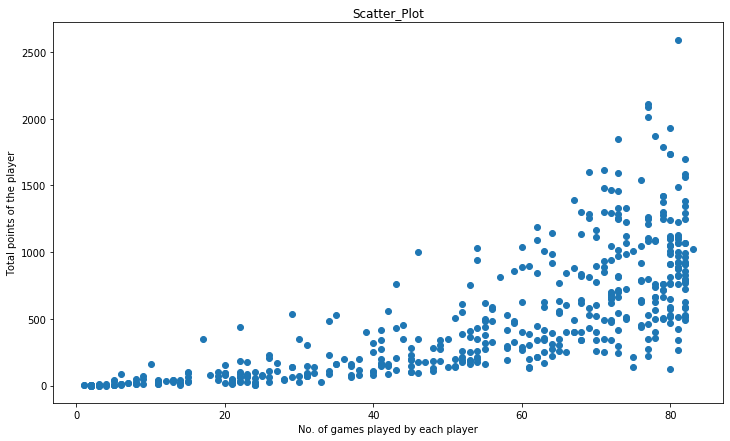

In [33]:
# data Visulisation:
plt.figure(figsize=(12,7))
plt.title("Scatter_Plot")
plt.xlabel("No. of games played by each player")
plt.ylabel("Total points of the player")
plt.scatter(nba['g'],nba['pts'])
plt.show()

(array([13.,  8.,  6.,  7.,  7.,  1.,  6.,  7.,  5.,  1.,  4.,  6., 13.,
         5.,  8.,  7.,  2.,  7.,  9.,  1.,  7.,  5.,  3.,  6.,  7.,  8.,
         9.,  4.,  5.,  6.,  4., 14., 16.,  4.,  6., 10.,  6., 15.,  7.,
        11., 14.,  7., 18., 31.,  8., 13., 26., 14., 45., 29.]),
 array([ 1.  ,  2.64,  4.28,  5.92,  7.56,  9.2 , 10.84, 12.48, 14.12,
        15.76, 17.4 , 19.04, 20.68, 22.32, 23.96, 25.6 , 27.24, 28.88,
        30.52, 32.16, 33.8 , 35.44, 37.08, 38.72, 40.36, 42.  , 43.64,
        45.28, 46.92, 48.56, 50.2 , 51.84, 53.48, 55.12, 56.76, 58.4 ,
        60.04, 61.68, 63.32, 64.96, 66.6 , 68.24, 69.88, 71.52, 73.16,
        74.8 , 76.44, 78.08, 79.72, 81.36, 83.  ]),
 <a list of 50 Patch objects>)

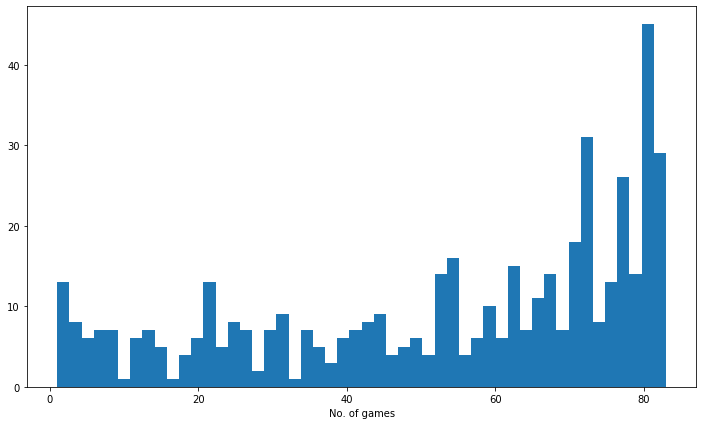

In [35]:
#Histogram of No. of games
plt.figure(figsize=(12,7))
plt.xlabel("No. of games")
plt.hist(nba['g'],bins=50)

(array([73., 41., 26., 31., 20., 18., 26., 14., 14., 21., 14., 14., 16.,
         9., 11., 15., 10., 16.,  6., 11., 13., 11.,  3.,  4., 12.,  6.,
         3.,  2.,  4.,  1.,  4.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   0.  ,   51.86,  103.72,  155.58,  207.44,  259.3 ,  311.16,
         363.02,  414.88,  466.74,  518.6 ,  570.46,  622.32,  674.18,
         726.04,  777.9 ,  829.76,  881.62,  933.48,  985.34, 1037.2 ,
        1089.06, 1140.92, 1192.78, 1244.64, 1296.5 , 1348.36, 1400.22,
        1452.08, 1503.94, 1555.8 , 1607.66, 1659.52, 1711.38, 1763.24,
        1815.1 , 1866.96, 1918.82, 1970.68, 2022.54, 2074.4 , 2126.26,
        2178.12, 2229.98, 2281.84, 2333.7 , 2385.56, 2437.42, 2489.28,
        2541.14, 2593.  ]),
 <a list of 50 Patch objects>)

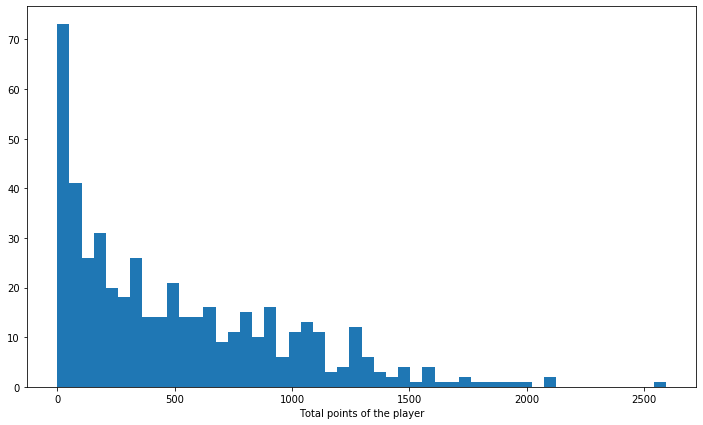

In [36]:
#Histogram_Total points of the player
plt.figure(figsize=(12,7))
plt.xlabel("Total points of the player")
plt.hist(nba['pts'],bins=50)

In [39]:
# correct the data - Data Imputation
#Null values replaced with '0'
nba_new = nba.fillna(0)
nba_new

player pos  age bref_team_id   g  gs    mp   fg   fga    fg.  \
0        Quincy Acy  SF   23          TOT  63   0   847   66   141  0.468   
1      Steven Adams   C   20          OKC  81  20  1197   93   185  0.503   
2       Jeff Adrien  PF   27          TOT  53  12   961  143   275  0.520   
3     Arron Afflalo  SG   28          ORL  73  73  2552  464  1011  0.459   
4     Alexis Ajinca   C   25          NOP  56  30   951  136   249  0.546   
..              ...  ..  ...          ...  ..  ..   ...  ...   ...    ...   
476     Tony Wroten  SG   20          PHI  72  16  1765  345   808  0.427   
477      Nick Young  SG   28          LAL  64   9  1810  387   889  0.435   
478  Thaddeus Young  PF   25          PHI  79  78  2718  582  1283  0.454   
479     Cody Zeller   C   21          CHA  82   3  1416  172   404  0.426   
480    Tyler Zeller   C   24          CLE  70   9  1049  156   290  0.538   

     ...  drb  trb  ast  stl  blk  tov   pf   pts     season  season_end  
0    ...  144  216   28   23   26   30  122   171  2013-2014        2013  
1    ...  190  332   43   40   57   71  203   265  2013-2014        2013  
2    ...  204  306   38   24   36   39  108   362  2013-2014        2013  
3    ...  230  262  248   35    3  146  136  1330  2013-2014        2013  
4    ...  183  277   40   23   46   63  187   328  2013-2014        2013  
..   ...  ...  ...  ...  ...  ...  ...  ...   ...        ...         ...  
476  ...  159  228  217   78   16  204  151   939  2013-2014        2013  
477  ...  137  166   95   46   12   95  156  1144  2013-2014        2013  
478  ...  310  476  182  167   36  165  213  1417  2013-2014        2013  
479  ...  235  353   92   40   41   87  170   490  2013-2014        2013  
480  ...  179  282   36   18   38   60  137   399  2013-2014        2013  

[481 rows x 31 columns]

In [42]:
#checking for NA
nba_new.isnull().values.any() #Check for any NA’s in the dataframe.

False

In [43]:
#Dropping columns: player, bref_team_id and season columns
nba_new.drop(["player","bref_team_id", "season"], axis=1, inplace=True)

In [47]:
#Converts categorical column 'pos' to place marker variables
nba_df = pd.get_dummies(data=nba_new,columns=["pos"])
nba_df

age   g  gs    mp   fg   fga    fg.  x3p  x3pa      x3p.  ...   pf   pts  \
0     23  63   0   847   66   141  0.468    4    15  0.266667  ...  122   171   
1     20  81  20  1197   93   185  0.503    0     0  0.000000  ...  203   265   
2     27  53  12   961  143   275  0.520    0     0  0.000000  ...  108   362   
3     28  73  73  2552  464  1011  0.459  128   300  0.426667  ...  136  1330   
4     25  56  30   951  136   249  0.546    0     1  0.000000  ...  187   328   
..   ...  ..  ..   ...  ...   ...    ...  ...   ...       ...  ...  ...   ...   
476   20  72  16  1765  345   808  0.427   40   188  0.212766  ...  151   939   
477   28  64   9  1810  387   889  0.435  135   350  0.385714  ...  156  1144   
478   25  79  78  2718  582  1283  0.454   90   292  0.308219  ...  213  1417   
479   21  82   3  1416  172   404  0.426    0     1  0.000000  ...  170   490   
480   24  70   9  1049  156   290  0.538    0     1  0.000000  ...  137   399   

     season_end  pos_C  pos_F  pos_G  pos_PF  pos_PG  pos_SF  pos_SG  
0          2013      0      0      0       0       0       1       0  
1          2013      1      0      0       0       0       0       0  
2          2013      0      0      0       1       0       0       0  
3          2013      0      0      0       0       0       0       1  
4          2013      1      0      0       0       0       0       0  
..          ...    ...    ...    ...     ...     ...     ...     ...  
476        2013      0      0      0       0       0       0       1  
477        2013      0      0      0       0       0       0       1  
478        2013      0      0      0       1       0       0       0  
479        2013      1      0      0       0       0       0       0  
480        2013      1      0      0       0       0       0       0  

[481 rows x 34 columns]

Ml- Split- Train and Test

In [48]:
#Selecting features and target
X=nba_df.drop("pts",axis=1)
y=nba_df.pts

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(X_train.shape) #Training data-predictor value : 70%
print(X_test.shape) #Test data-predictor value : 30%
print(y_train.shape) #Training data-target value : 70%
print(y_test.shape) #Test data -target value : 30%

(336, 33)
(145, 33)
(336,)
(145,)


Training Model

In [50]:
#Instantiating learning model (k = 5)
knn = KNeighborsRegressor(n_neighbors=5)

In [51]:
#Fitting the model
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [52]:
#Predicting "total points of the player" with test data set
pred = knn.predict(X_test)

In [53]:
#Printing the predicted "total points of the player"
print(pred[:10])

[561.  456.8 184.8 142.8  23.2 171.4  89.2  78.8   9.6  30.6]


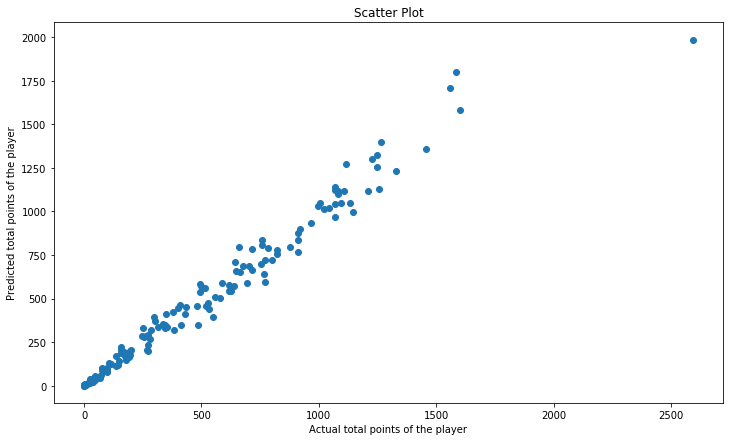

In [54]:
#Scatter Plot of "Actual total points of the player" and "Predicted total points of the player"
plt.figure(figsize=(12,7))
plt.title("Scatter Plot")
plt.xlabel("Actual total points of the player")
plt.ylabel("Predicted total points of the player")
plt.scatter(y_test,pred)
plt.show()

In [56]:
#Test
#Caluculate and print RMSE value for the model
print(np.sqrt(mean_squared_error(y_test,pred)))

79.84875012516929


# 2.2 Problem Statement: Machine Learning 8

In this assignment students have to find the frequency of words in a
webpage. User can use urllib and BeautifulSoup to extract text from
webpage.
Hint:
from bs4 import BeautifulSoup
import urllib.request
import nltk
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [58]:
pip install beautifulsoup4 #need to install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Libraries
import nltk
import urllib.request
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#url and html fetch
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [3]:
print(soup.title)

<title>PHP: Hypertext Preprocessor</title>


In [4]:
print(soup.title.string)

PHP: Hypertext Preprocessor


In [6]:
#Extracting text 
text = soup.get_text()
text

"\n\n  \n  \n\n  PHP: Hypertext Preprocessor\n\n \n \n \n \n\n \n \n \n\n\n\n\n\n\n\n\n\n \n\n \n\n \n\n \n\n \n\n\n\n\n\n  \n    \n    \n    \n    \n      Downloads\n      Documentation\n      Get Involved\n      Help\n    \n    \n      \n      \n    \n  \n  \n\n\nGetting Started\n\tIntroduction\n\tA simple tutorial\nLanguage Reference\n\tBasic syntax\n\tTypes\n\tVariables\n\tConstants\n\tExpressions\n\tOperators\n\tControl Structures\n\tFunctions\n\tClasses and Objects\n\tNamespaces\n\tErrors\n\tExceptions\n\tGenerators\n\tReferences Explained\n\tPredefined Variables\n\tPredefined Exceptions\n\tPredefined Interfaces and Classes\n\tContext options and parameters\n\tSupported Protocols and Wrappers\n\n\nSecurity\n\tIntroduction\n\tGeneral considerations\n\tInstalled as CGI binary\n\tInstalled as an Apache module\n\tSession Security\n\tFilesystem Security\n\tDatabase Security\n\tError Reporting\n\tUsing Register Globals\n\tUser Submitted Data\n\tMagic Quotes\n\tHiding PHP\n\tKeeping Cur

In [7]:
#finding tokens
tokens = re.findall('\w+', text)
tokens

['PHP',
 'Hypertext',
 'Preprocessor',
 'Downloads',
 'Documentation',
 'Get',
 'Involved',
 'Help',
 'Getting',
 'Started',
 'Introduction',
 'A',
 'simple',
 'tutorial',
 'Language',
 'Reference',
 'Basic',
 'syntax',
 'Types',
 'Variables',
 'Constants',
 'Expressions',
 'Operators',
 'Control',
 'Structures',
 'Functions',
 'Classes',
 'and',
 'Objects',
 'Namespaces',
 'Errors',
 'Exceptions',
 'Generators',
 'References',
 'Explained',
 'Predefined',
 'Variables',
 'Predefined',
 'Exceptions',
 'Predefined',
 'Interfaces',
 'and',
 'Classes',
 'Context',
 'options',
 'and',
 'parameters',
 'Supported',
 'Protocols',
 'and',
 'Wrappers',
 'Security',
 'Introduction',
 'General',
 'considerations',
 'Installed',
 'as',
 'CGI',
 'binary',
 'Installed',
 'as',
 'an',
 'Apache',
 'module',
 'Session',
 'Security',
 'Filesystem',
 'Security',
 'Database',
 'Security',
 'Error',
 'Reporting',
 'Using',
 'Register',
 'Globals',
 'User',
 'Submitted',
 'Data',
 'Magic',
 'Quotes',
 'Hidin

In [8]:
#printing the words
tokens[:10]   # printing words list

['PHP',
 'Hypertext',
 'Preprocessor',
 'Downloads',
 'Documentation',
 'Get',
 'Involved',
 'Help',
 'Getting',
 'Started']

In [10]:
#cleaning the words by lowercase standardisation
words = []
for word in tokens:
  words.append(word.lower())
words[:10]

['php',
 'hypertext',
 'preprocessor',
 'downloads',
 'documentation',
 'get',
 'involved',
 'help',
 'getting',
 'started']

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tmsgsks\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
stopWords = nltk.corpus.stopwords.words('english')
stopWords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [13]:
print("Total including stopwords:", len(words))
clean_words = []
for w in words:
  if w not in stopWords:
    clean_words.append(w)

Total including stopwords: 5998


In [14]:
print("Length after stopwords:", len(clean_words) )

Length after stopwords: 3855


In [15]:
print("Total removed stopwords:", len(words)-len(clean_words) )

Total removed stopwords: 2143


In [17]:
clean_words[:30]

['php',
 'hypertext',
 'preprocessor',
 'downloads',
 'documentation',
 'get',
 'involved',
 'help',
 'getting',
 'started',
 'introduction',
 'simple',
 'tutorial',
 'language',
 'reference',
 'basic',
 'syntax',
 'types',
 'variables',
 'constants',
 'expressions',
 'operators',
 'control',
 'structures',
 'functions',
 'classes',
 'objects',
 'namespaces',
 'errors',
 'exceptions']

In [18]:
#finding frequency of words
counts  = nltk.FreqDist(clean_words)
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)
print("%i types and %i tokens in the text with %0.3f lexical diversity" % (vocab, words, lexdiv))

416 types and 3855 tokens in the text with 9.267 lexical diversity


In [19]:
print(counts.most_common(20))

[('php', 305), ('7', 184), ('release', 161), ('found', 104), ('3', 93), ('4', 78), ('please', 76), ('version', 72), ('upgrading', 71), ('file', 70), ('0', 62), ('windows', 49), ('2', 46), ('changes', 46), ('downloads', 45), ('source', 43), ('list', 43), ('test', 43), ('qa', 42), ('page', 40)]


In [20]:
print(counts.max())

php


In [23]:
print(counts.hapaxes()[0:20])

['hypertext', 'preprocessor', 'documentation', 'get', 'involved', 'getting', 'started', 'simple', 'tutorial', 'syntax', 'types', 'constants', 'expressions', 'operators', 'structures', 'objects', 'namespaces', 'errors', 'generators', 'explained']


In [24]:
counts.freq('php'), counts.freq('hypertext')

(0.07911802853437094, 0.00025940337224383917)

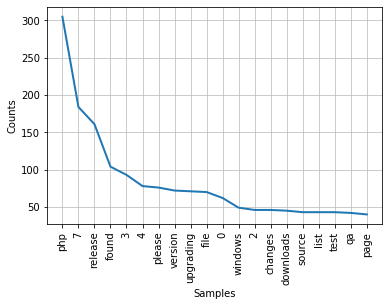

In [25]:
counts.plot(20, cumulative=False)

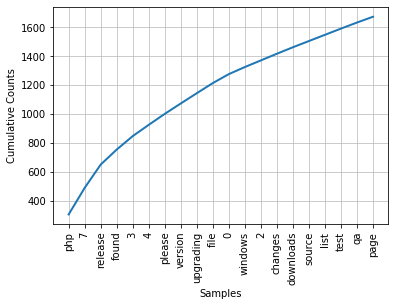

In [26]:
counts.plot(20, cumulative=True)

# 2.3. Problem Statement: Machine Learning 9

In this assignment students have to compress racoon grey scale image into
5 clusters. In the end, visualize both raw and compressed image and look
for quality difference.
The raw image is available in spicy.misc package with the name face.
Hint:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc

In [74]:
# Libraries
import numpy as np
from sklearn.cluster import KMeans
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import cluster
from scipy.misc import face
from skimage.measure import compare_ssim as ssim

In [75]:
image = scipy.misc.face(gray=False)

In [76]:
image.shape

(768, 1024, 3)

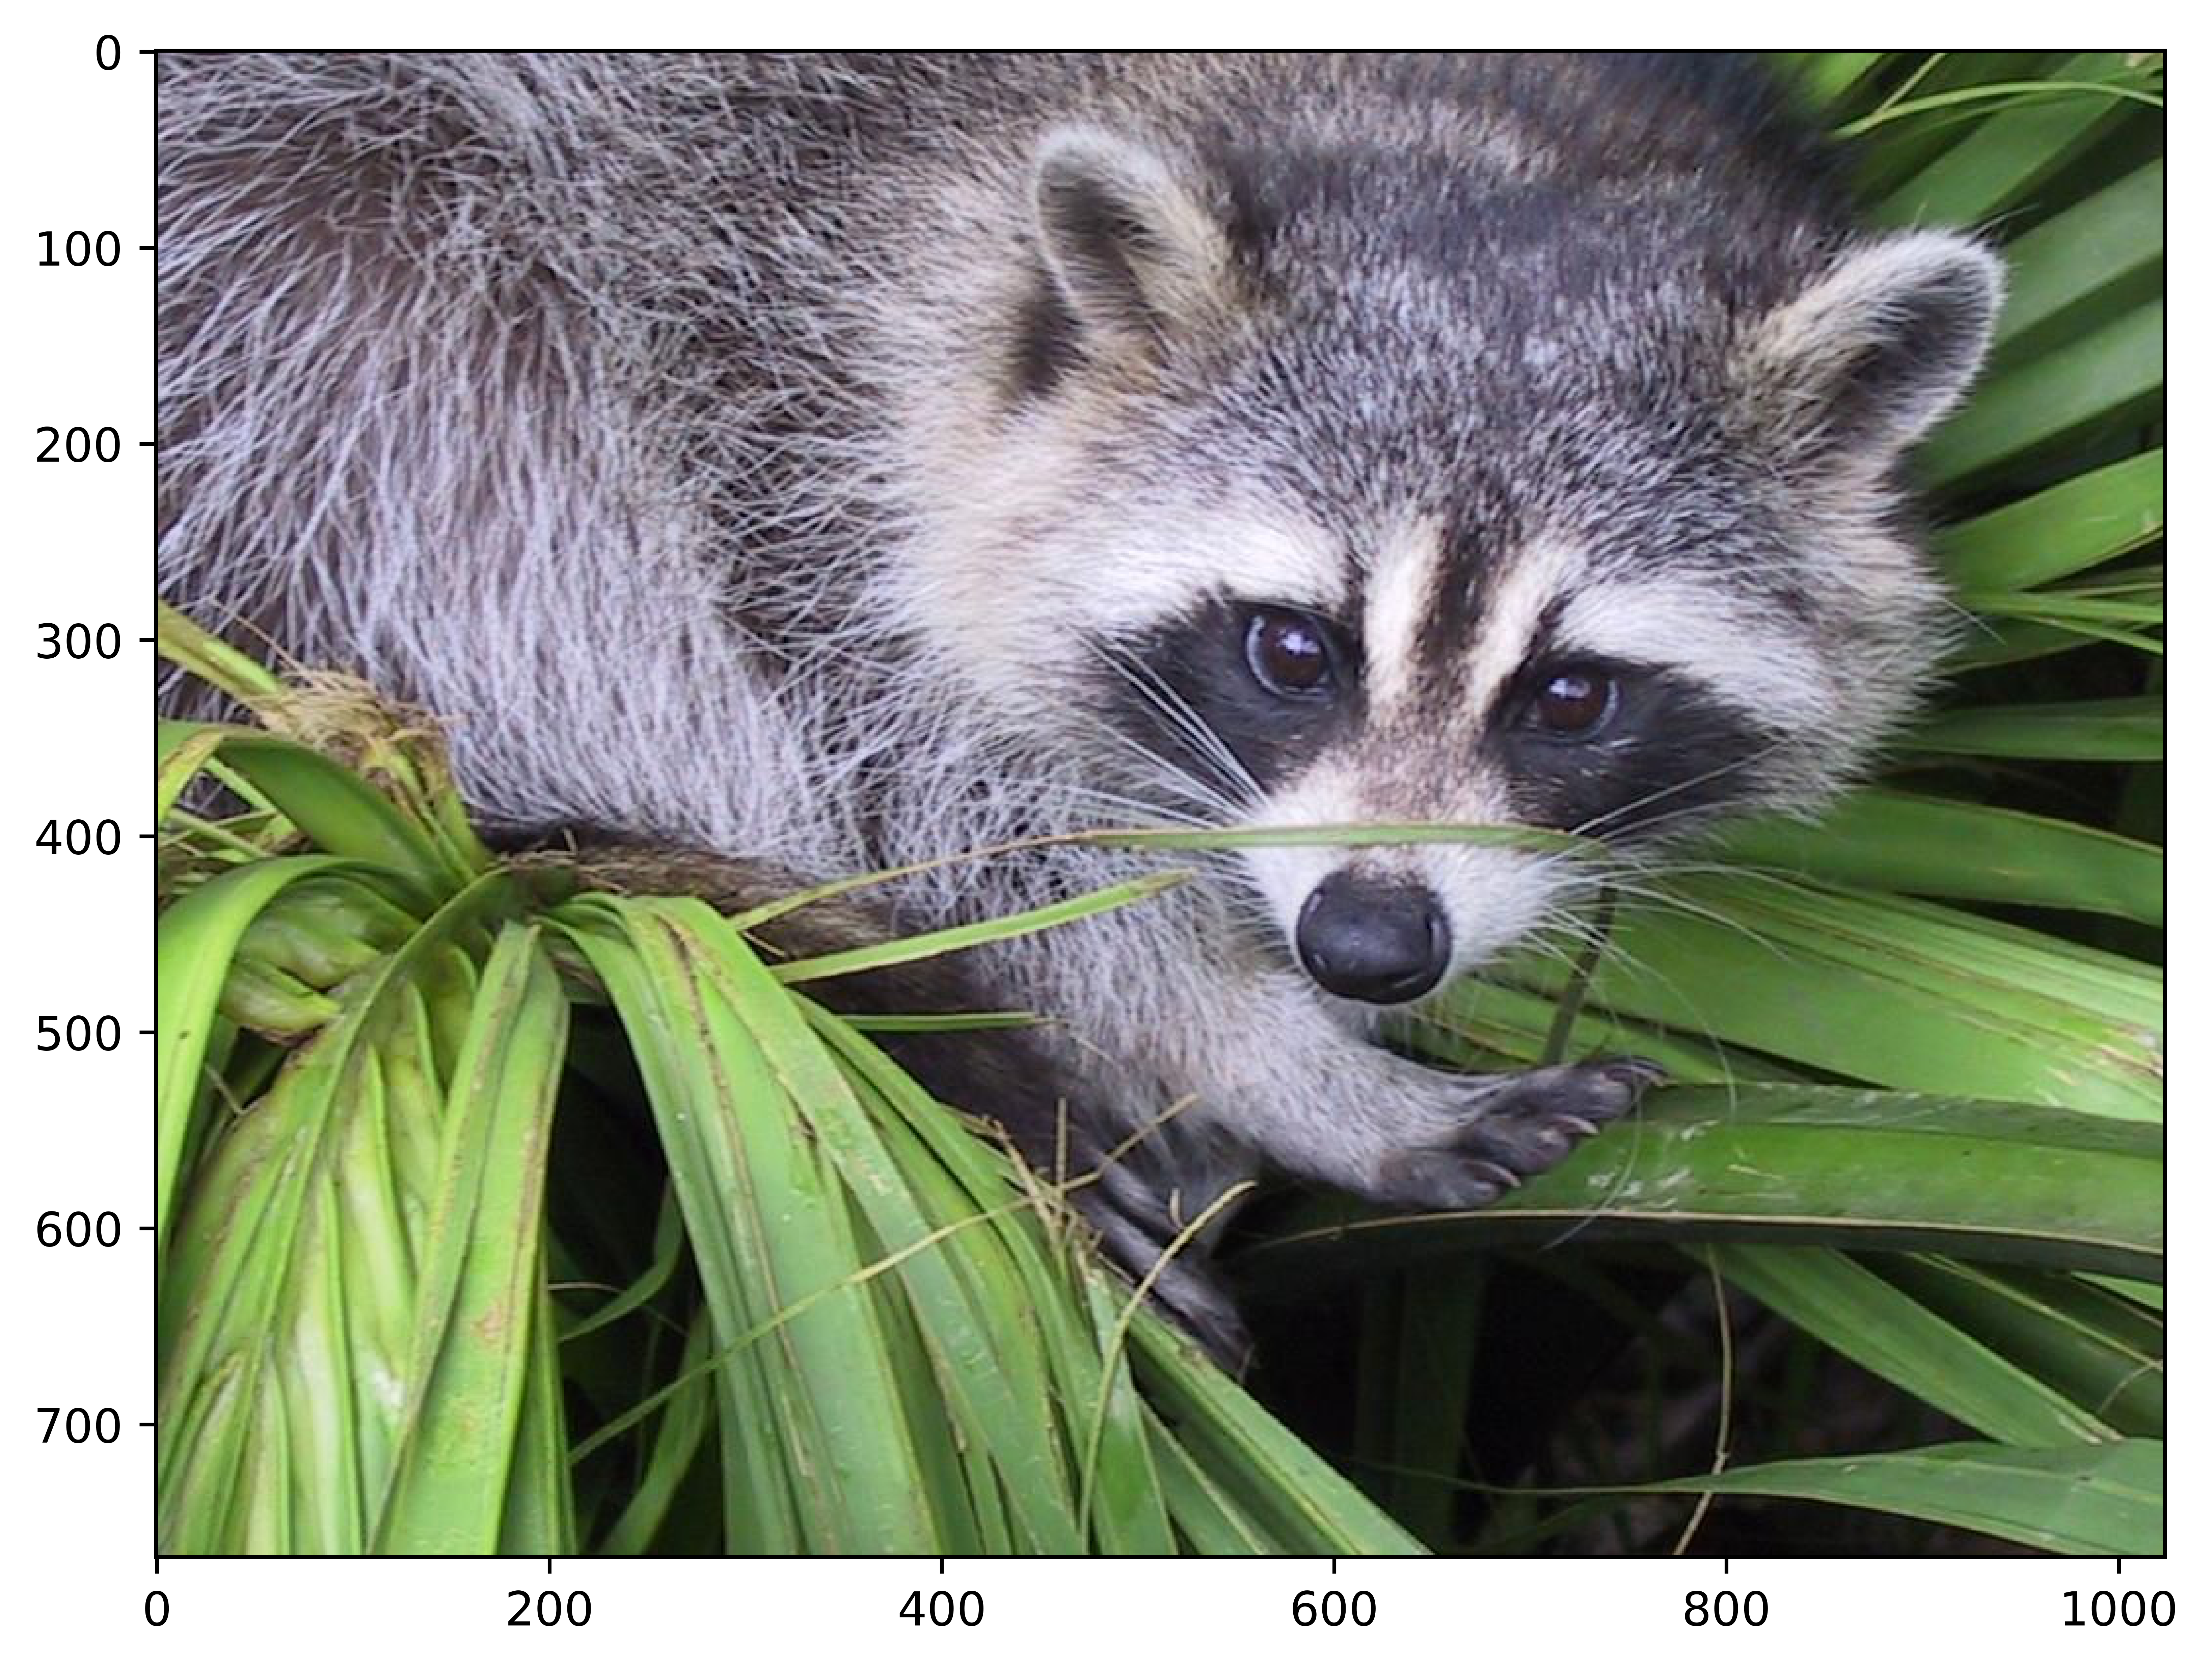

In [77]:
plt.figure(figsize=(7.68,10.24), dpi=1000)
plt.imshow(image)

In [78]:
image_reshape = (image / 255).reshape(-1,3)

In [79]:
image_reshape.shape

(786432, 3)

In [80]:
from sklearn.cluster import KMeans
k_colors = KMeans(n_clusters=5).fit(image_reshape)
y_pred=k_colors.predict(image_reshape)

In [81]:
k_colors.cluster_centers_.shape

(5, 3)

In [82]:
k_colors.labels_.shape

(786432,)

In [83]:
compress=k_colors.cluster_centers_[k_colors.labels_]

In [84]:
compress.shape

(786432, 3)

In [85]:
compress=np.reshape(compress, (image.shape))

In [86]:
compress.shape

(768, 1024, 3)

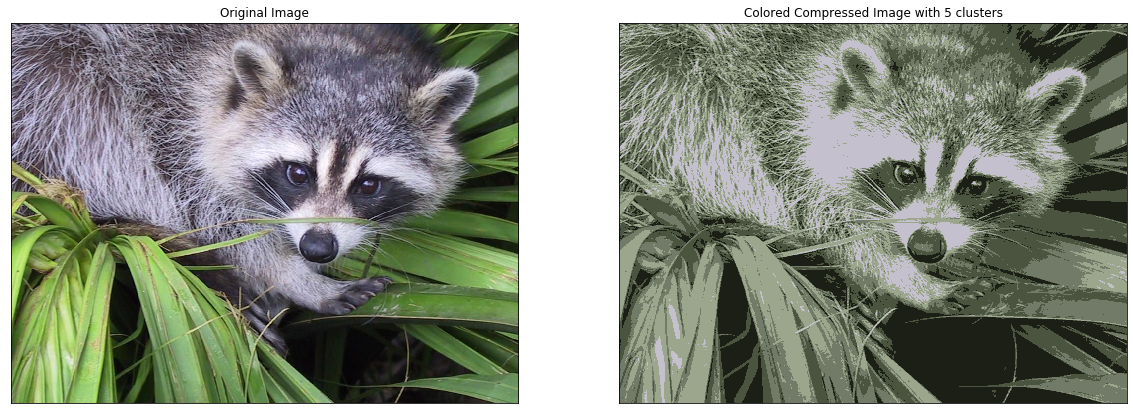

In [87]:
fig = plt.figure(figsize=(20,20))
ax=fig.add_subplot(1,2,1,xticks=[],yticks=[],title='Original Image')
ax.imshow(image)
ax=fig.add_subplot(1,2,2,xticks=[],yticks=[],title='Colored Compressed Image with 5 clusters')
ax.imshow(compress)
plt.show()

# 2.4. Problem Statement: Machine Learning 10

In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.
Hint:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [64]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets

In [65]:
iris = datasets.load_iris()

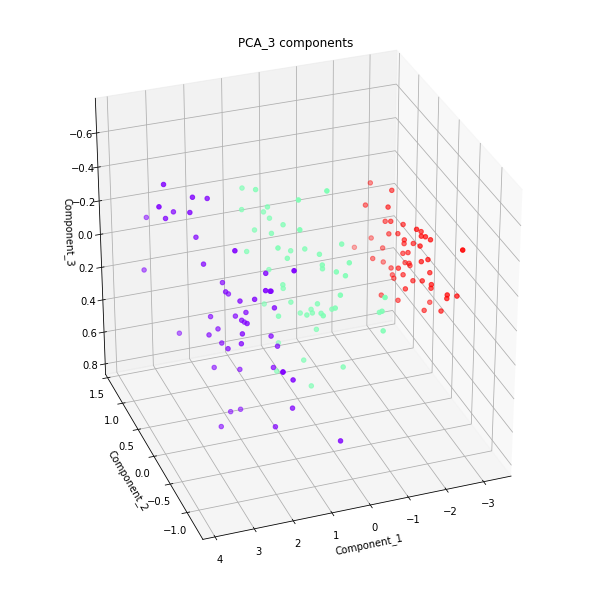

In [73]:
X = PCA(n_components=3).fit_transform(iris.data)
Y = iris.target

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y,
           cmap=plt.cm.rainbow_r)

ax.set_title("PCA_3 components")
ax.set_xlabel("Component_1")
ax.set_ylabel("Component_2")
ax.set_zlabel("Component_3")
ax.grid()
plt.show()

# 2.5. Problem Statement: Machine Learning 11

In this assignment students have to make ARIMA model over shampoo sales
data and check the MSE between predicted and actual value.
Student can download data in .csv format from the following link:
https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-threeyear-
period#!ds =22r0&display=line
Hint:
Following is the command import packages
and data from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model
import ARIMA from sklearn.metrics
import mean_squared_error def
parser(x):
return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0],
index_col=0, squeeze=True, date_parser=parser)

In [93]:
# Libraries
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [103]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [104]:
shampoo_sales = pd.read_csv('shampoo_sales.csv', header=0, parse_dates=True, index_col='Month')
shampoo_sales.head()

Sales of shampoo over a three year period
Month                                           
1-01                                       266.0
1-02                                       145.9
1-03                                       183.1
1-04                                       119.3
1-05                                       180.3

In [105]:
shampoo_sales.describe()

Sales of shampoo over a three year period
count                                  36.000000
mean                                  312.600000
std                                   148.937164
min                                   119.300000
25%                                   192.450000
50%                                   280.150000
75%                                   411.100000
max                                   682.000000

In [106]:
shampoo_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 1-01 to Sales of shampoo over a three year period
Data columns (total 1 columns):
Sales of shampoo over a three year period    36 non-null float64
dtypes: float64(1)
memory usage: 592.0+ bytes


In [107]:
shampoo_sales.columns.values 

array(['Sales of shampoo over a three year period'], dtype=object)

In [108]:
shampoo_sales.shape

(37, 1)

In [109]:
shampoo_sales.isnull().values.any()

True

In [111]:
shampoo_sales.dropna(axis=0, inplace=True)

In [113]:
shampoo_sales.isnull().values.any()

False

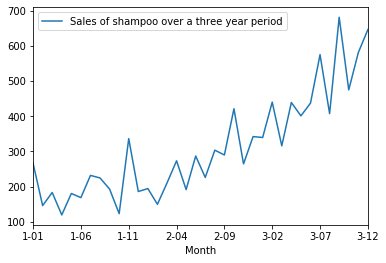

In [114]:
shampoo_sales.plot()
pyplot.show()

In [115]:
X = shampoo_sales.values
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [116]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [117]:
train, test = X[0:size], X[size:len(X)]

In [127]:
actual= [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(actual, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    actual.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=272.964481, expected=421.600000
predicted=290.313952, expected=264.500000
predicted=349.117692, expected=342.300000
predicted=306.512866, expected=339.700000
predicted=387.376465, expected=440.400000
predicted=348.154144, expected=315.900000
predicted=386.308801, expected=439.300000
predicted=356.082088, expected=401.300000
predicted=446.379471, expected=437.400000
predicted=394.737288, expected=575.500000
predicted=434.915413, expected=407.600000
predicted=507.923472, expected=682.000000
predicted=435.482761, expected=475.300000
predicted=652.743901, expected=581.300000
predicted=546.343472, expected=646.900000
Test MSE: 7547.808


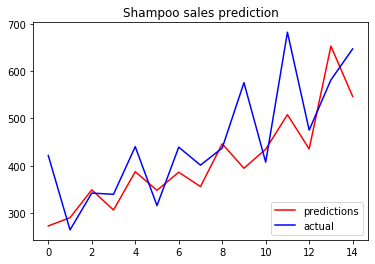

In [126]:
pyplot.plot(predictions, color='red', label= 'predictions')
pyplot.plot(test, color='blue', label = 'actual')
pyplot.title('Shampoo sales prediction')
pyplot.legend(loc=4)
pyplot.show()

# THE END